In [388]:
import pandas as pd 
df = pd.read_csv("./adult.csv", skipinitialspace=True, na_values="?")

for col in ['workclass', 'educatoin', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    df[col] = df[col].astype('category')
    
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
educatoin         category
educatoin_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

In [389]:
category_columns = list(df.select_dtypes(include=['category']).columns)
category_columns

['workclass',
 'educatoin',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [390]:
numberic_columns = list(df.select_dtypes(include=['int64']).columns)
#because educatoin_num had relationship with educatoin
numberic_columns.remove('educatoin_num')
numberic_columns

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [391]:
# remove rows with missing values
for col in category_columns:
    df = df[df[col].str.contains("\\?") == False]
nrow2 = df.shape[0]
nrow2

30162

In [392]:
df['income'].unique()

[<=50K, >50K]
Categories (2, object): [<=50K, >50K]

In [393]:
import seaborn as sns
sns.set(font_scale=1.5)

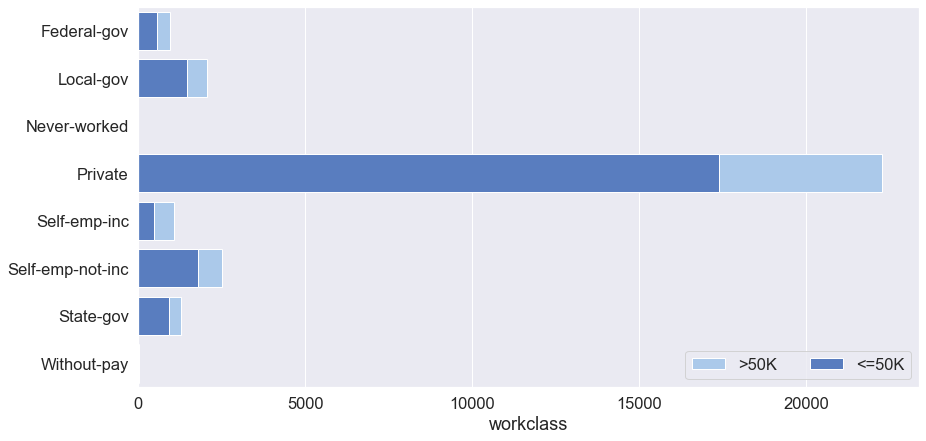

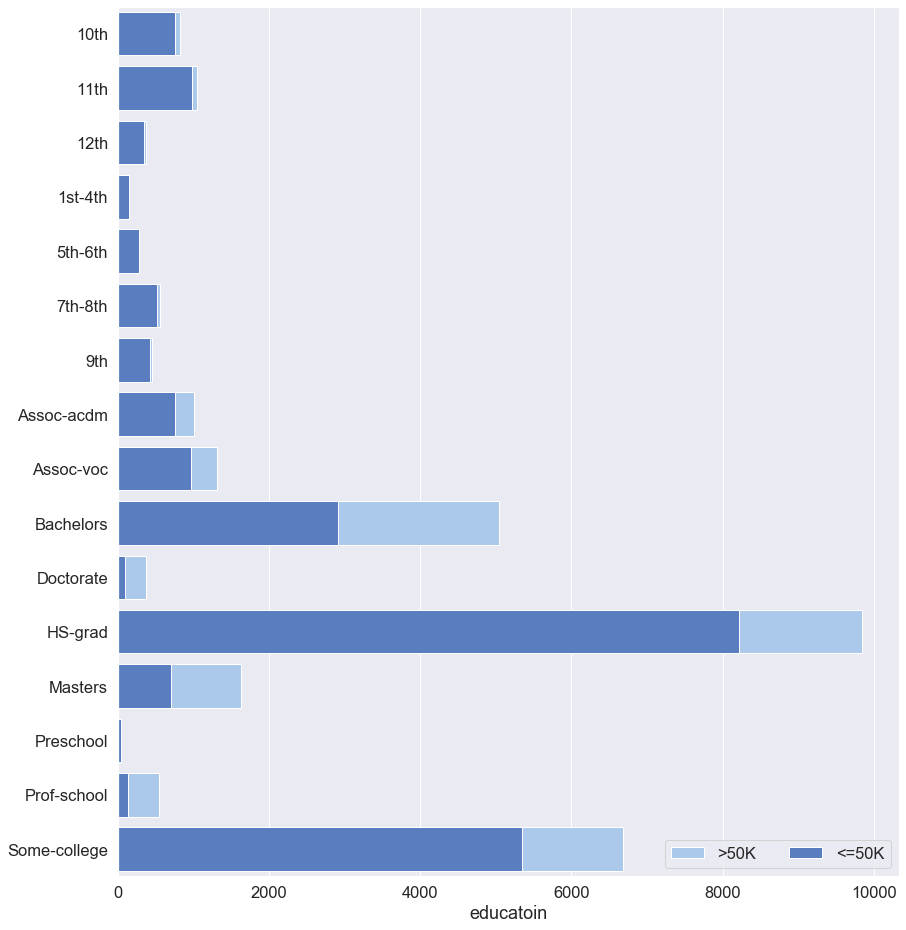

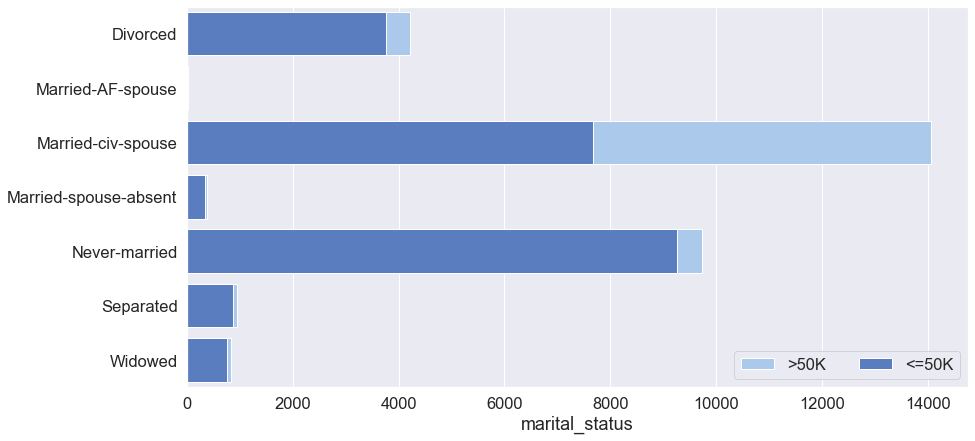

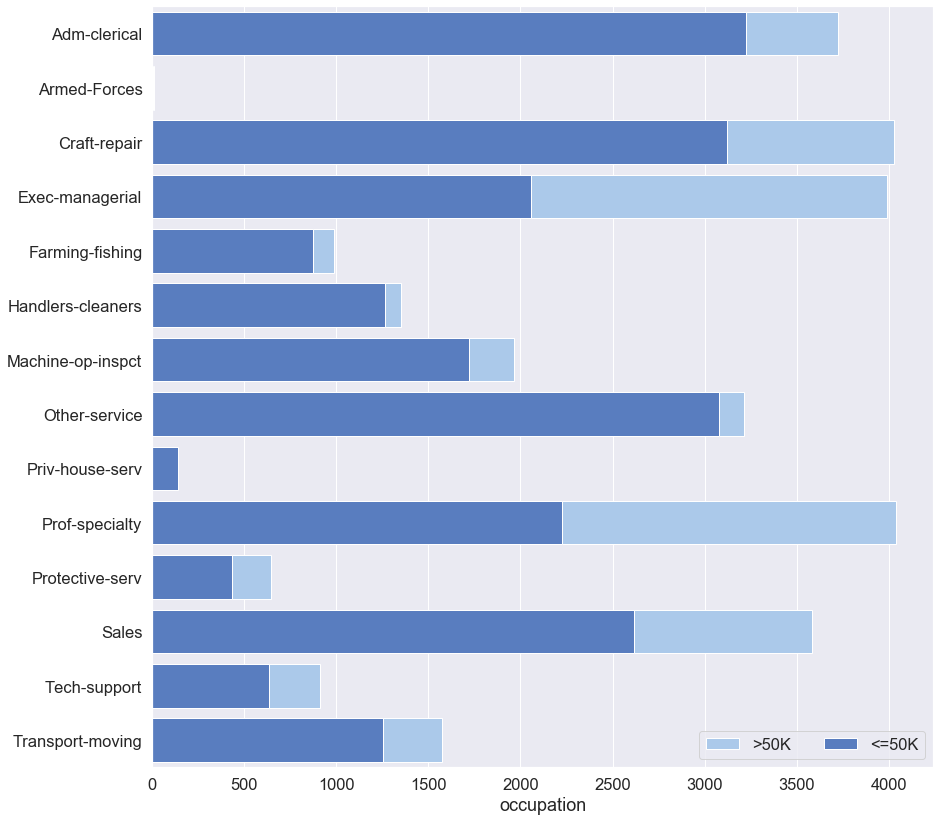

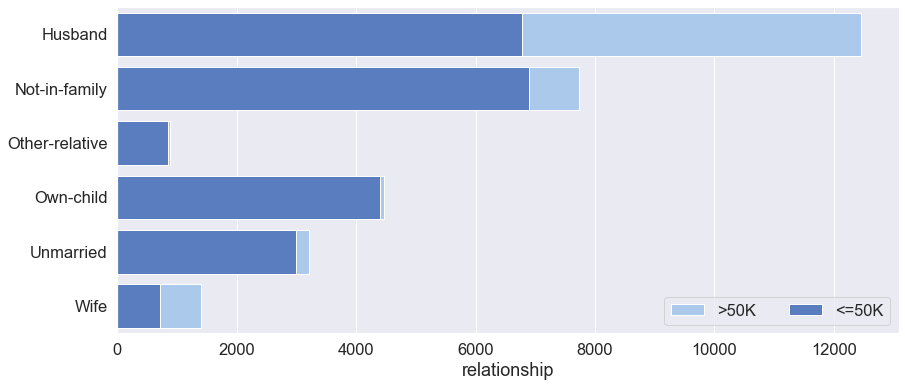

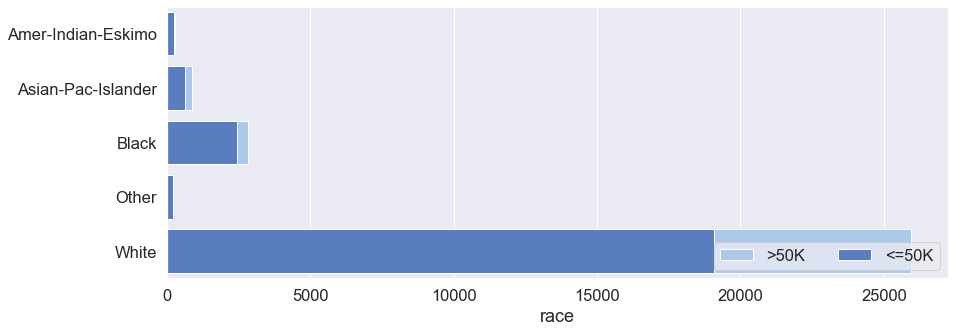

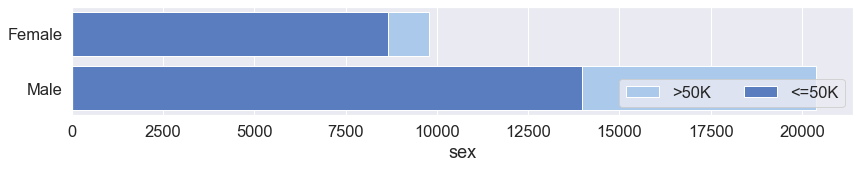

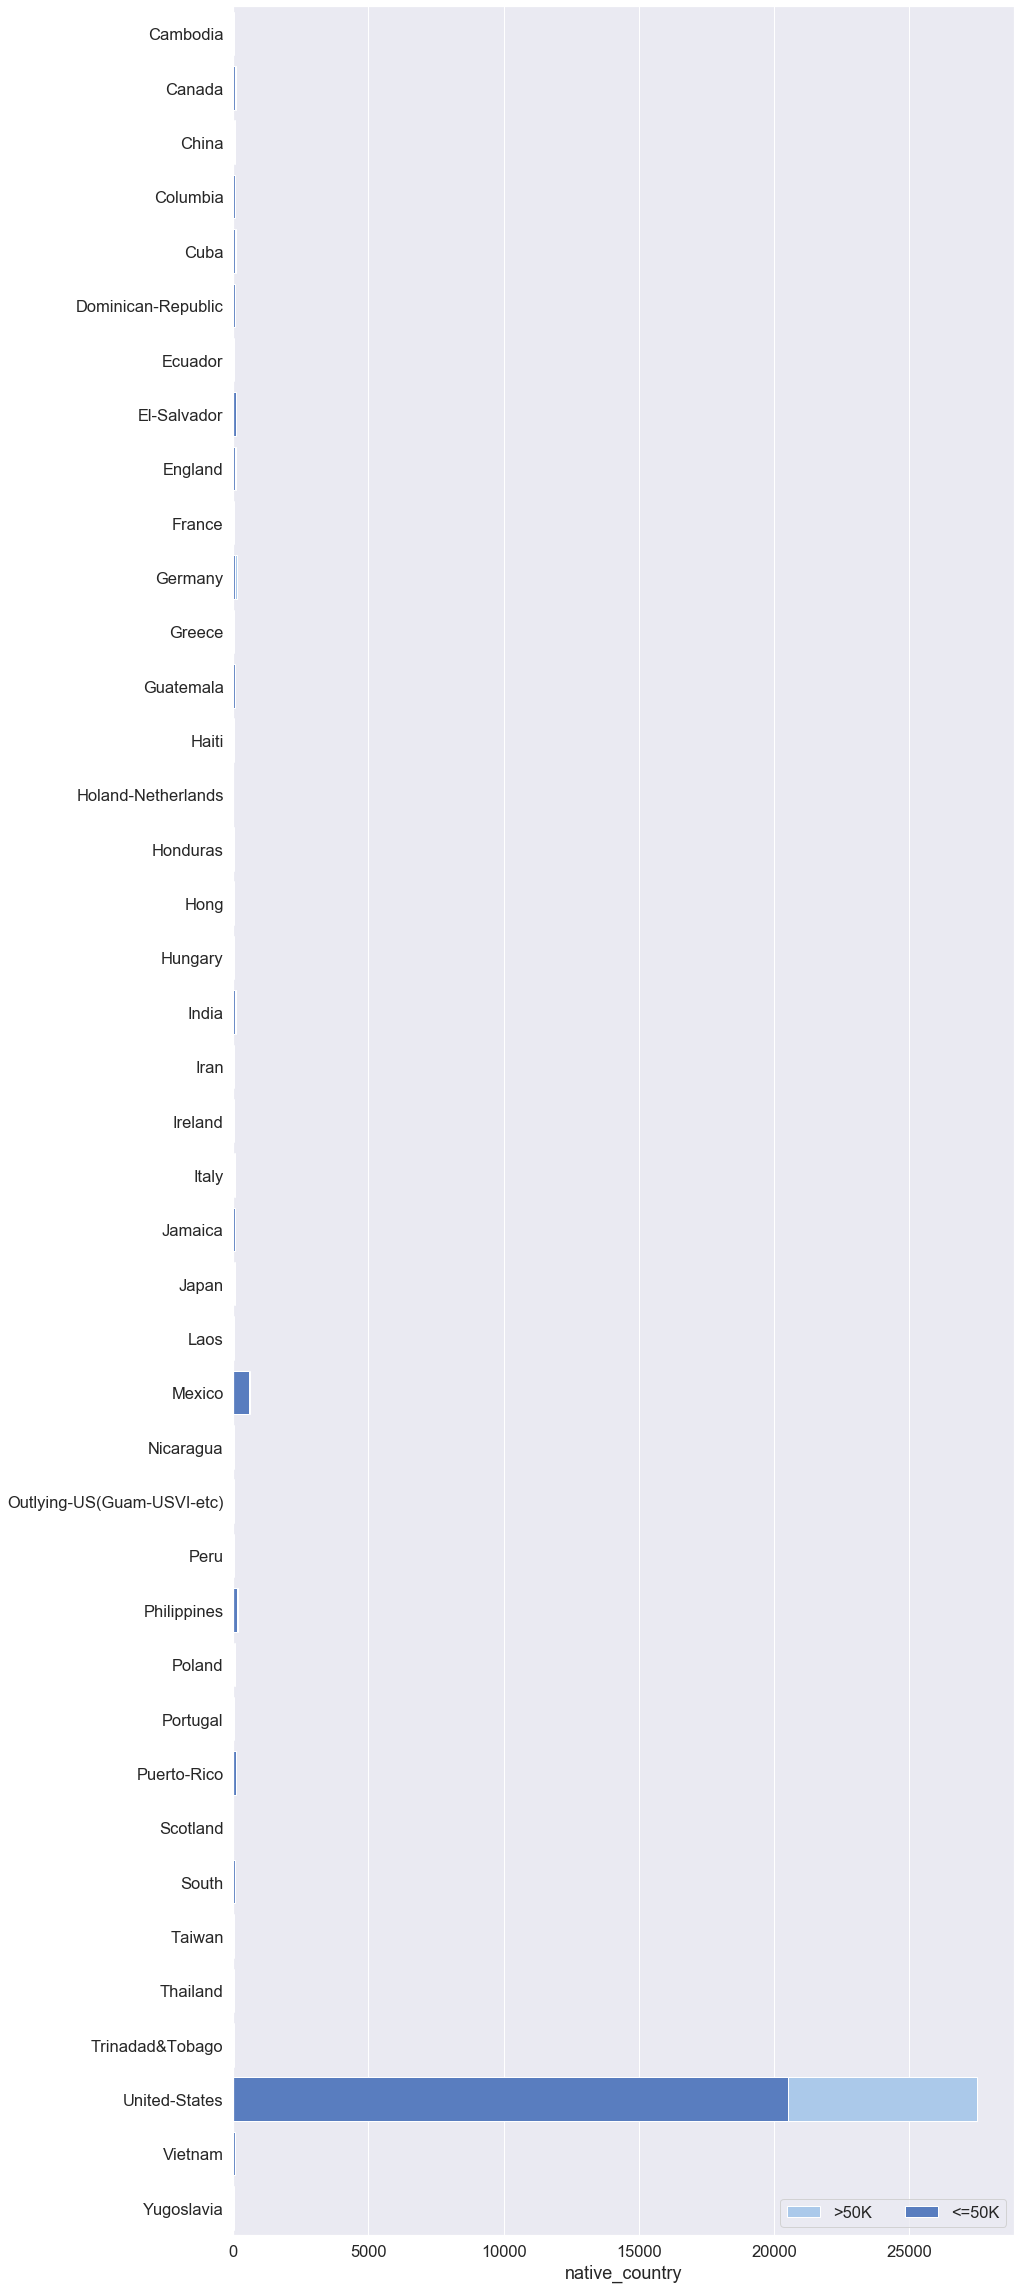

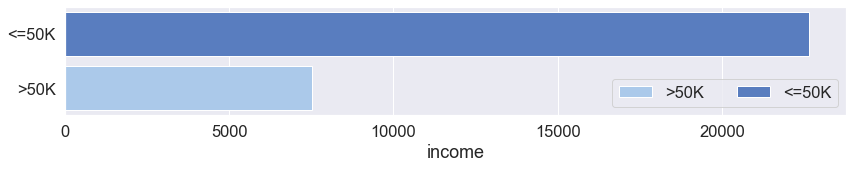

In [394]:
import matplotlib.pyplot as plt
df_low_income = df[df['income'] == '<=50K']
for col in category_columns:
    total_column = df[col].unique().size
    f, ax = plt.subplots(figsize=(14, total_column))
    
    sns.set_color_codes("pastel")
    sns.countplot(y=col, data=df, color="b", label=">50K")
    
    sns.set_color_codes("muted")
    sns.countplot(y=col, data=df_low_income, color="b", label="<=50K")
    
    max = df[col].value_counts().max()
    ax.set(xlim=(0, max * 1.05), ylabel="", xlabel=col)
    
    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)


In [395]:
df.income = df.income.apply(lambda x:0 if x=='<=50K' else 1)
df.income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [396]:
# one hot encoding sex 
one_hot_coding =  pd.get_dummies(df[['workclass',
 'educatoin',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']])
one_hot_coding.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,educatoin_10th,educatoin_11th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [397]:
columns = list(one_hot_coding.columns) 
columns

['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'educatoin_10th',
 'educatoin_11th',
 'educatoin_12th',
 'educatoin_1st-4th',
 'educatoin_5th-6th',
 'educatoin_7th-8th',
 'educatoin_9th',
 'educatoin_Assoc-acdm',
 'educatoin_Assoc-voc',
 'educatoin_Bachelors',
 'educatoin_Doctorate',
 'educatoin_HS-grad',
 'educatoin_Masters',
 'educatoin_Preschool',
 'educatoin_Prof-school',
 'educatoin_Some-college',
 'marital_status_Divorced',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-o

In [398]:
combined = pd.concat([df['income'], df[numberic_columns], one_hot_coding], axis=1)
combined.head()

,income,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,39,77516,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,50,83311,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,38,215646,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0,53,234721,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,28,338409,0,0,40,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [399]:

# X = df[['age', 'workclass', 'fnlwgt', 'educatoin', 'educatoin_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']]
X = combined[columns]
y = combined['income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

In [400]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [401]:
#Confusion Matrix
#The result is telling us that we have 2089+416 correct predictions and 335+177 incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2089  177]
 [ 335  416]]


In [402]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2266
           1       0.70      0.55      0.62       751

    accuracy                           0.83      3017
   macro avg       0.78      0.74      0.75      3017
weighted avg       0.82      0.83      0.82      3017



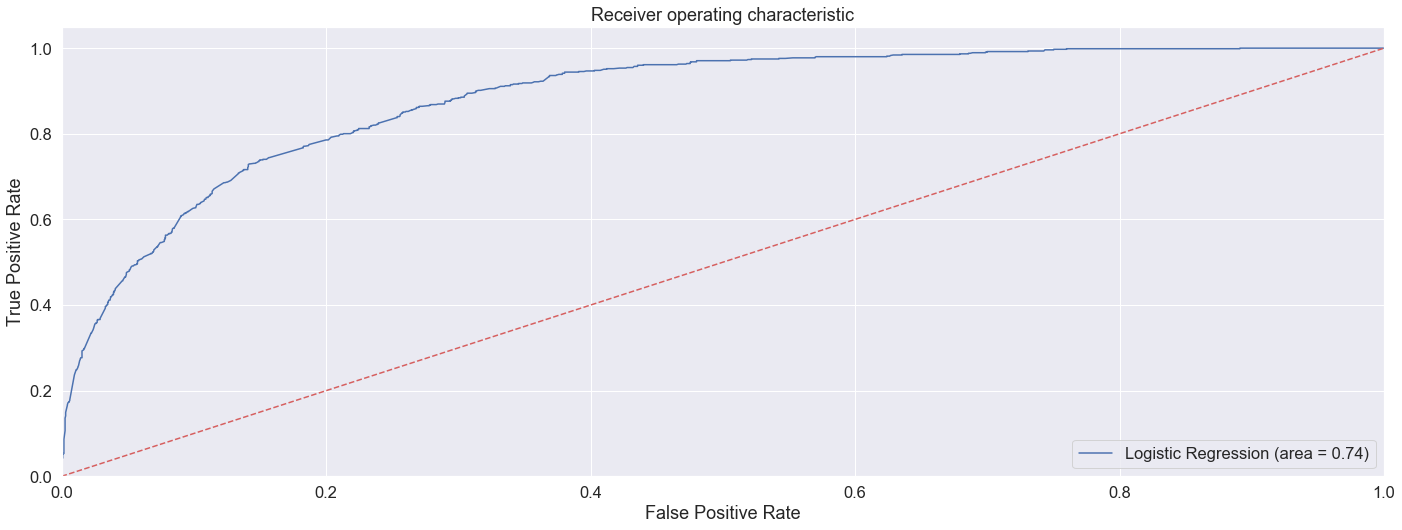

In [403]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#reference https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8